In [1]:
import numpy as np
import pandas as pd
from math import sqrt
import joblib,math,re,warnings
# 特征缩放模块
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
# scikit-learn 的特征选择模块
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

# 机器学习模块
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor

warnings.filterwarnings("ignore")
regex = re.compile(r"\[|\]|<", re.IGNORECASE)

# 从 list1 中删除 list2 中包含的元素，返回一个新list
def remove_from_one_list(list1,list2):
    z = []
    for m in list1:
        if m not in list2:
            z.append(m)
    return z


def rf(X_train, y_train):
    # 随机森林树回归
    
    RForest = RandomForestRegressor(max_leaf_nodes=1000,n_estimators=10000,max_features="sqrt",n_jobs=-1,random_state=0,oob_score=False)
    RForest = RandomForestRegressor()
    #     param_grid=dict(max_depth = [10,100])
#     grid_search = GridSearchCV(RForest,param_grid,n_jobs = -1,cv = 5)
#     grid_result = grid_search.fit(X_train, y_train) #运行网格搜索
    
#     RForest=grid_result.best_estimator_
    RForest.fit(X_train,y_train)
    return RForest

def print_model_regression_results_by_dataset(model,train_dataset,test_dataset):
    y_test = test_dataset['y']
    y_train=train_dataset['y'].ravel()
    X_test = test_dataset[remove_from_one_list(list(test_dataset.columns),['y'])]
    X_train=train_dataset[remove_from_one_list(list(test_dataset.columns),['y'])]
    r2 = r2_score(y_train,model.predict(X_train))
    q2 = r2_score(y_test,model.predict(X_test))
    rmse = sqrt(mean_squared_error(y_test, model.predict(X_test)))
    mae = mean_absolute_error(y_test, model.predict(X_test))
    print("R2   ", r2)
    print("Q2  ", q2)
    print('RMSE  ', rmse)
    print('MAE  ', mae)
    

def print_model_regression_results_by_x_y(model,X_train,y_train,X_test,y_test):
    r2 = r2_score(y_train,model.predict(X_train))
    q2 = r2_score(y_test,model.predict(X_test))
    rmse = sqrt(mean_squared_error(y_test, model.predict(X_test)))
    mae = mean_absolute_error(y_test, model.predict(X_test))
    print("R2   ", r2)
    print("Q2  ", q2)
    print('RMSE  ', rmse)
    print('MAE  ', mae)
    

In [2]:
data = pd.read_csv("k_with_added_features.csv",index_col = 'ids')

In [3]:
data

,maxNCharge,minNCharge,alphaV,betaV,gammaV,weightedV,maxestate_N,sumestate_N,min_estate,qed,...,fr_phenol_noOrthoHbond,fr_piperdine,fr_piperzine,fr_pyridine,fr_unbrch_alkane,MaxPartialCharge,MinPartialCharge,MaxAbsPartialCharge,MinAbsPartialCharge,y
ids,,,,,,,,,,,,,,,,,,,,,
CC1CCNC1,-0.316455,-0.316455,0.0,0.00000,0.00000,0.000000,3.271991,3.271991,3.271991,0.454315,...,0,0,0,0,0,-0.002268,-0.316455,0.316455,0.002268,-5.285483
C(C(CN)CN)N,-0.330099,-0.330099,0.0,38.21278,38.21278,-19.106390,5.233796,5.233796,5.233796,0.405639,...,0,0,0,0,0,-0.002470,-0.330099,0.330099,0.002470,-8.943376
C(C(CN)CO)N,-0.330060,-0.330060,0.0,31.68543,31.68543,-15.842715,5.153796,5.153796,5.153796,0.408312,...,0,0,0,0,0,0.048294,-0.395987,0.395987,0.048294,-8.205310
C(C(CO)CO)N,-0.330021,-0.330021,0.0,31.68543,31.68543,-15.842715,5.073796,5.073796,5.073796,0.410946,...,0,0,0,0,0,0.049284,-0.395947,0.395947,0.049284,-8.941403
C(CCCN)CCN,-0.330474,-0.330474,0.0,0.00000,0.00000,0.000000,5.279493,5.279493,5.279493,0.512739,...,0,0,0,0,3,-0.007728,-0.330474,0.330474,0.007728,-5.801169
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NCCOC1CCCC1,-0.328249,-0.328249,0.0,0.00000,0.00000,0.000000,5.281624,5.281624,5.281624,0.614247,...,0,0,0,0,0,0.059199,-0.376912,0.376912,0.059199,-6.905190
NCCOCc1ccco1,-0.328249,-0.328249,0.0,0.00000,0.00000,0.000000,5.212363,5.212363,5.212363,0.629402,...,0,0,0,0,1,0.128932,-0.466898,0.466898,0.128932,-10.037270
NCCOCCN,-0.328250,-0.328250,0.0,0.00000,0.00000,0.000000,5.103472,5.103472,5.103472,0.445901,...,0,0,0,0,2,0.058887,-0.378829,0.378829,0.058887,-7.024749


In [4]:
from sklearn.feature_selection import VarianceThreshold
feature_column = remove_from_one_list(data.columns.values.tolist(),["y"])  # 获得所有的特征名称
X,y = data[feature_column],data['y']
X_train_for_feature_selector,X_test_for_feature_selector,y_train_for_feature_selector,y_test_for_feature_selector = train_test_split(X, y, test_size=0.2, random_state=0)
X_train_for_feature_selector = X_train_for_feature_selector[feature_column]

selector = VarianceThreshold(threshold=(0))
selector.fit_transform(X_train_for_feature_selector)
#保留特征名称
select_name_index = selector.get_support(indices=True)  # 留下特征的索引值，list格式
select_name = []
for i in select_name_index:
    select_name.append(feature_column[i])

select_name

['maxNCharge',
 'minNCharge',
 'alphaV',
 'betaV',
 'gammaV',
 'weightedV',
 'maxestate_N',
 'sumestate_N',
 'min_estate',
 'qed',
 'MolWt',
 'HeavyAtomMolWt',
 'ExactMolWt',
 'NumValenceElectrons',
 'FpDensityMorgan1',
 'FpDensityMorgan2',
 'FpDensityMorgan3',
 'BCUT2D_MWHI',
 'BCUT2D_MWLOW',
 'BCUT2D_CHGHI',
 'BCUT2D_CHGLO',
 'BCUT2D_LOGPHI',
 'BCUT2D_LOGPLOW',
 'BCUT2D_MRHI',
 'BCUT2D_MRLOW',
 'BalabanJ',
 'BertzCT',
 'Chi0',
 'Chi0n',
 'Chi0v',
 'Chi1',
 'Chi1n',
 'Chi1v',
 'Chi2n',
 'Chi2v',
 'Chi3n',
 'Chi3v',
 'Chi4n',
 'Chi4v',
 'HallKierAlpha',
 'Ipc',
 'Kappa1',
 'Kappa2',
 'Kappa3',
 'LabuteASA',
 'PEOE_VSA1',
 'PEOE_VSA10',
 'PEOE_VSA11',
 'PEOE_VSA2',
 'PEOE_VSA3',
 'PEOE_VSA6',
 'PEOE_VSA7',
 'PEOE_VSA8',
 'PEOE_VSA9',
 'SMR_VSA1',
 'SMR_VSA3',
 'SMR_VSA4',
 'SMR_VSA5',
 'SMR_VSA6',
 'SMR_VSA7',
 'SMR_VSA9',
 'SlogP_VSA1',
 'SlogP_VSA11',
 'SlogP_VSA2',
 'SlogP_VSA3',
 'SlogP_VSA4',
 'SlogP_VSA5',
 'SlogP_VSA6',
 'TPSA',
 'EState_VSA1',
 'EState_VSA10',
 'EState_VSA2',
 '

In [5]:
def get_high_correlation_columns(data,corr_index):
    corr_matrix = data.corr().abs()
    matrix = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
    return [column for column in matrix.columns if any(matrix[column] > corr_index)]

to_drop=get_high_correlation_columns(X_train_for_feature_selector[select_name],0.95)
select_name = X_train_for_feature_selector.columns.drop(to_drop)
print(to_drop)

['gammaV', 'HeavyAtomMolWt', 'ExactMolWt', 'NumValenceElectrons', 'Chi0', 'Chi0n', 'Chi0v', 'Chi1', 'Chi1v', 'Chi2v', 'Chi3v', 'Chi4n', 'Chi4v', 'LabuteASA', 'SMR_VSA7', 'SlogP_VSA11', 'SlogP_VSA5', 'SlogP_VSA6', 'VSA_EState6', 'FractionCSP3', 'HeavyAtomCount', 'NumAromaticRings', 'NumHAcceptors', 'NumHeteroatoms', 'NumSaturatedCarbocycles', 'NumSaturatedHeterocycles', 'NumSaturatedRings', 'MolMR', 'fr_Al_OH_noTert', 'fr_NH0', 'fr_NH2', 'fr_Nhpyrrole', 'fr_benzene', 'fr_imidazole', 'fr_phenol', 'fr_phenol_noOrthoHbond', 'MaxAbsPartialCharge', 'MinAbsPartialCharge']


In [6]:
train_dataset = data[:159]
test_dataset = data[159:]

In [7]:
select_name

Index(['maxNCharge', 'minNCharge', 'alphaV', 'betaV', 'weightedV',
       'maxestate_N', 'sumestate_N', 'min_estate', 'qed', 'MolWt',
       ...
       'fr_ether', 'fr_furan', 'fr_methoxy', 'fr_morpholine', 'fr_piperdine',
       'fr_piperzine', 'fr_pyridine', 'fr_unbrch_alkane', 'MaxPartialCharge',
       'MinPartialCharge'],
      dtype='object', length=104)

In [8]:
def get_SelectKBest_list(X, y,k_number):
    from sklearn.feature_selection import SelectKBest, mutual_info_regression
    selector = SelectKBest(mutual_info_regression, k=k_number)
    selector_model = selector.fit(X, y)
    # 6、对特征重要性进行排序
    df_scores = pd.DataFrame(selector_model.scores_)
    df_columns = pd.DataFrame(X.columns)
    # 合并
    df_feature_scores = pd.concat([df_columns, df_scores], axis=1)
    # 定义列名
    df_feature_scores.columns = ['Feature', 'Score']
    # 选取前 100 个 column
    sorted_column = df_feature_scores.sort_values(by='Score', ascending=False).head(k_number)
    select_column = sorted_column.Feature
    return select_column

In [9]:
select_name = get_SelectKBest_list(X_train_for_feature_selector[select_name], y_train_for_feature_selector,14)


In [10]:
# feature_name = get_SelectKBest_list(X_train_for_feature_selector[select_name], y_train_for_feature_selector,20)
# feature_name = feature_name.to_list()
# feature_name

In [11]:
select_name=select_name.to_list()

In [12]:
select_name

['SMR_VSA1',
 'EState_VSA9',
 'MolLogP',
 'MinPartialCharge',
 'TPSA',
 'FpDensityMorgan2',
 'SlogP_VSA2',
 'NOCount',
 'MaxPartialCharge',
 'Chi3n',
 'FpDensityMorgan3',
 'BCUT2D_MWHI',
 'HallKierAlpha',
 'VSA_EState3']

In [13]:
select_name.append("y")

In [14]:
data = data[select_name]
data

,SMR_VSA1,EState_VSA9,MolLogP,MinPartialCharge,TPSA,FpDensityMorgan2,SlogP_VSA2,NOCount,MaxPartialCharge,Chi3n,FpDensityMorgan3,BCUT2D_MWHI,HallKierAlpha,VSA_EState3,y
ids,,,,,,,,,,,,,,,
CC1CCNC1,0.000000,0.000000,0.6158,-0.316455,12.03,2.500000,13.089513,1,-0.002268,1.306713,2.666667,14.885305,-0.04,3.271991,-5.285483
C(C(CN)CN)N,0.000000,17.201002,-1.5213,-0.330099,78.06,1.142857,19.634269,3,-0.002470,1.000000,1.142857,14.668283,-0.12,0.000000,-8.943376
C(C(CN)CO)N,5.106527,16.573862,-1.4877,-0.395987,72.27,1.714286,24.802922,3,0.048294,0.924866,1.714286,16.251112,-0.12,8.366019,-8.205310
C(C(CO)CO)N,10.213055,15.946722,-1.4541,-0.395947,66.48,1.714286,29.971575,3,0.049284,0.849731,1.714286,16.267279,-0.12,16.572037,-8.941403
C(CCCN)CCN,0.000000,11.467335,0.4642,-0.330474,52.04,1.000000,13.089513,2,-0.007728,1.158248,1.250000,14.520187,-0.08,0.000000,-5.801169
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NCCOC1CCCC1,4.736863,10.470530,0.9043,-0.376912,35.25,2.000000,19.255605,2,0.059199,1.773603,2.555556,16.486335,-0.08,0.000000,-6.905190
NCCOCc1ccco1,9.154014,14.887681,0.7549,-0.466898,48.39,2.500000,13.151638,3,0.128932,1.086611,3.100000,16.485064,-0.80,0.000000,-10.037270
NCCOCCN,4.736863,16.204198,-1.0796,-0.378829,61.27,1.428571,26.303277,3,0.058887,0.524377,1.714286,16.473893,-0.12,0.000000,-7.024749


In [15]:
select_name.remove("y")

In [16]:
train_dataset = data[:159]
test_dataset = data[159:]

y_train = train_dataset['y']
X_train = train_dataset[select_name]
X_test = test_dataset[select_name]
y_test = test_dataset['y']

In [17]:
model_xgb = rf(X_train,y_train)

print_model_regression_results_by_dataset(model_xgb,train_dataset,test_dataset)

R2    0.897591506710665
Q2   0.1056097978517675
RMSE   1.4036646337115475
MAE   1.152531041997568


['SMR_VSA1',
 'EState_VSA9',
 'TPSA',
 'MolLogP',
 'FpDensityMorgan2',
 'LabuteASA',
 'SlogP_VSA5',
 'SlogP_VSA2',
 'HeavyAtomMolWt',
 'NumHeteroatoms',
 'NOCount',
 'NumHAcceptors',
 'Chi3n',
 'Chi3v']

In [18]:
select_name = ["maxNCharge","alphaV","betaV","maxestate_N",'VSA_EState4', 'VSA_EState3', 'SMR_VSA3', 'SMR_VSA4', 'TPSA', 'EState_VSA9', 'SlogP_VSA1', 'SlogP_VSA2', 'PEOE_VSA1', 'EState_VSA8', 'SMR_VSA6']
select_name = ["maxNCharge","alphaV","betaV","maxestate_N",
 'SMR_VSA1',
 'EState_VSA9',
 'FpDensityMorgan2',
 'TPSA',
 'MolLogP',
 'SlogP_VSA2',
 'NOCount',
 'Chi3n',
 'BCUT2D_MWHI',
 'HallKierAlpha',
 'FpDensityMorgan3',
 'VSA_EState3',
 'BCUT2D_MRLOW',
 'SMR_VSA5',
 'EState_VSA5']

select_name = ["maxNCharge","alphaV","betaV","maxestate_N",
 'SMR_VSA1',
 'TPSA',
 'EState_VSA9',
 'FpDensityMorgan2',
 'SlogP_VSA2',
 'MolLogP',
 'NOCount',
 'Chi3n',
 'BCUT2D_MWHI']

select_name = ["maxNCharge","alphaV","betaV","maxestate_N",
'SMR_VSA1',
 'EState_VSA9',
 'TPSA',
 'MolLogP',
 'FpDensityMorgan2',
 'LabuteASA',
 'BCUT2D_MWHI',
 'SlogP_VSA2',
 'HeavyAtomMolWt',
 'NumHeteroatoms']

select_name = ["maxNCharge","alphaV","betaV","maxestate_N",
 'SMR_VSA1',
 'EState_VSA9',
 'MolLogP',
 'FpDensityMorgan2',
 'MinPartialCharge',
 'TPSA',
 'SlogP_VSA2',
 'NOCount',
 'MaxPartialCharge',
 'Chi3n',
 'BCUT2D_MWHI',
 'FpDensityMorgan3',
 'VSA_EState3',
 'BCUT2D_MRLOW']

In [28]:
data = pd.read_csv("k_with_added_features.csv",index_col = 'ids')
X,y = data[select_name],data['y']
X_train_random,X_test_random,y_train_random,y_test_random = train_test_split(X, y, test_size=0.2, random_state=0)
model = rf(X_train_random,y_train_random)
print_model_regression_results_by_x_y(model,X_train_random,y_train_random,X_test_random,y_test_random)

R2    0.9019677982161729
Q2   0.48791116415576363
RMSE   1.0010653847493693
MAE   0.7720751913447499


In [29]:
train_dataset = data[:159]
test_dataset = data[159:]

y_train = train_dataset['y']
X_train = train_dataset[select_name]
X_test = test_dataset[select_name]
y_test = test_dataset['y']

In [30]:
import shap

In [31]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train_random)


In [32]:
shap.initjs()

In [33]:
shap.force_plot(explainer.expected_value, shap_values[0,:], X_train_random.iloc[0,:])


In [34]:
shap.force_plot(explainer.expected_value, shap_values[:200,:], X_train_random.iloc[:200,:])


In [35]:
import matplotlib as mpl

mpl.rcParams['font.sans-serif']=['Arial'] # 字体Arial

mpl.rcParams['font.size'] = 40
# mpl
mpl.rcParams['axes.grid'] = False  # 不显示网格
mpl.rcParams['lines.linewidth'] = 3 # 线宽
mpl.rcParams['axes.linewidth'] = 3 # 边框线宽
# mpl.rcParams["font.weight"] = "bold"
mpl.rcParams["axes.labelweight"] = "bold"

In [36]:
feature_column = select_name

In [37]:
import matplotlib.pyplot as plt
plt.figure()

mpl.rcParams['text.color']='blue'


In [38]:
# shap_values_bar = explainer(X_train)
# shap.plots.bar(shap_values_bar,max_display=20)
# shap.plots.bar(shap_values.abs.mean(0))



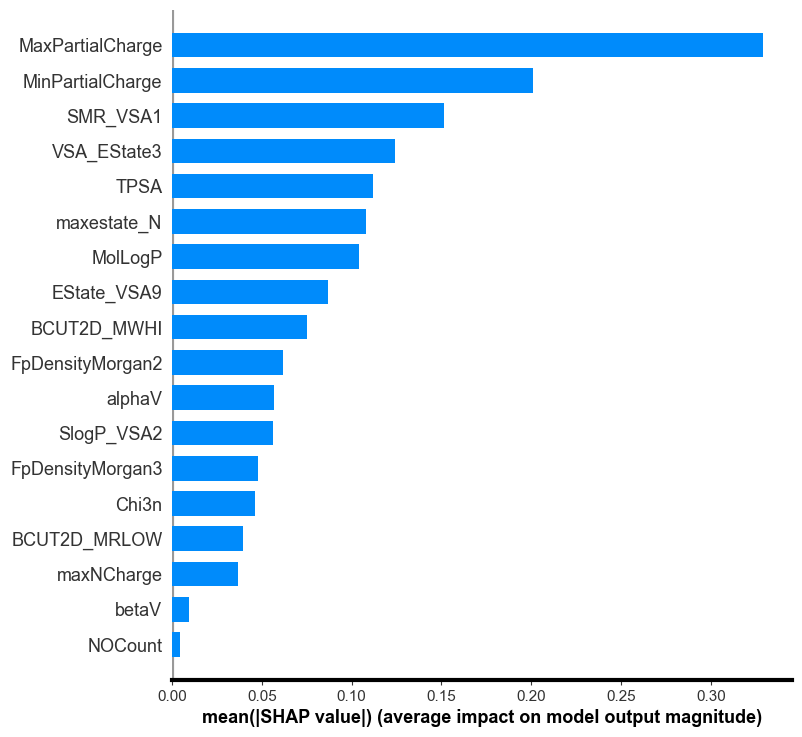

In [39]:
shap.summary_plot(shap_values, X_train_random, plot_type="bar")



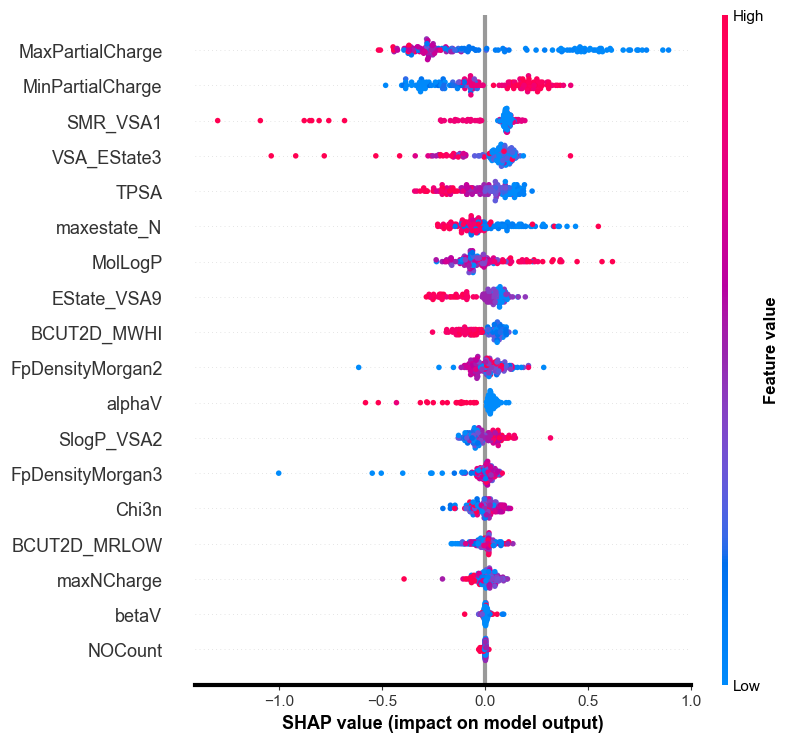

In [40]:
shap.summary_plot(shap_values, X_train_random)




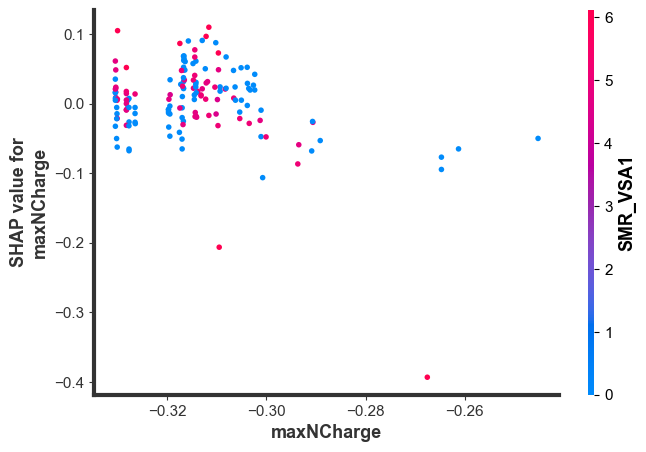

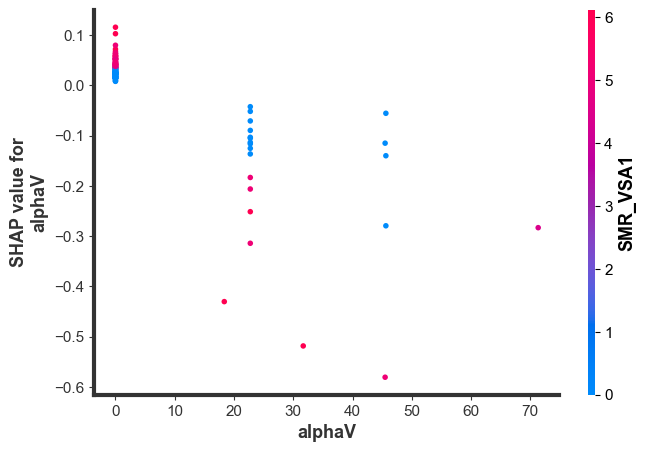

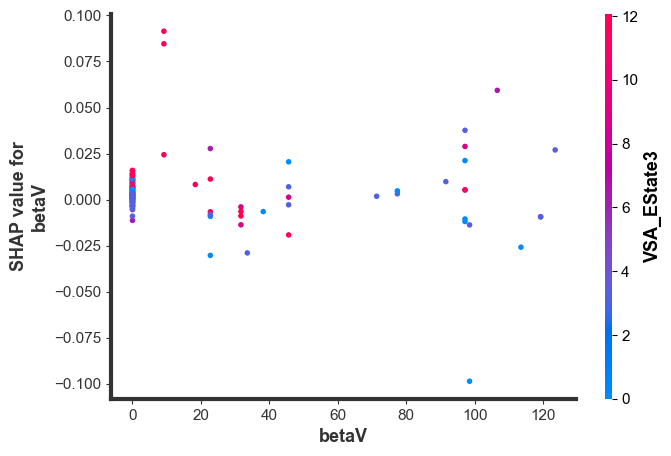

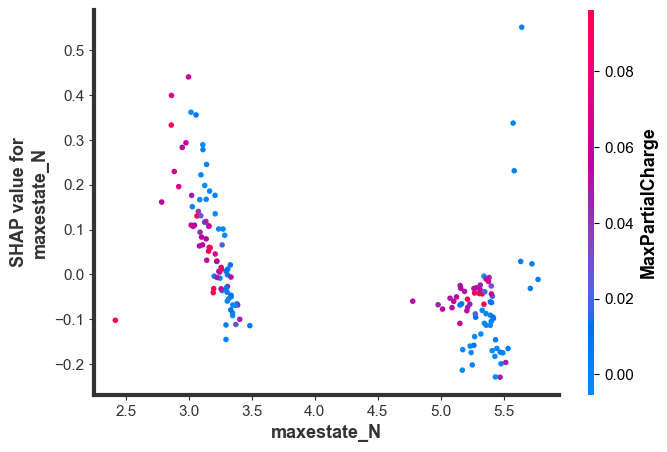

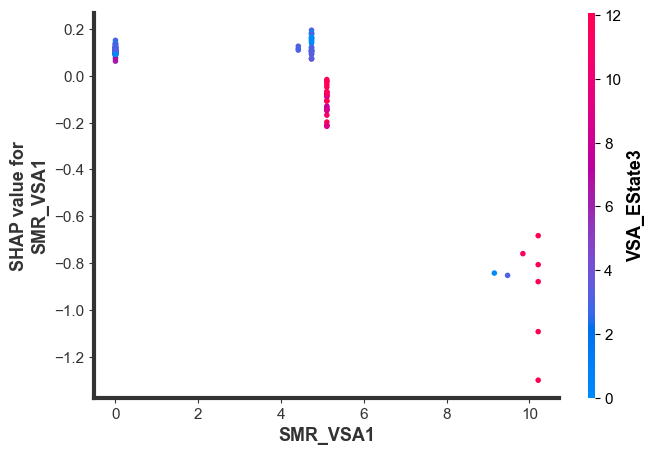

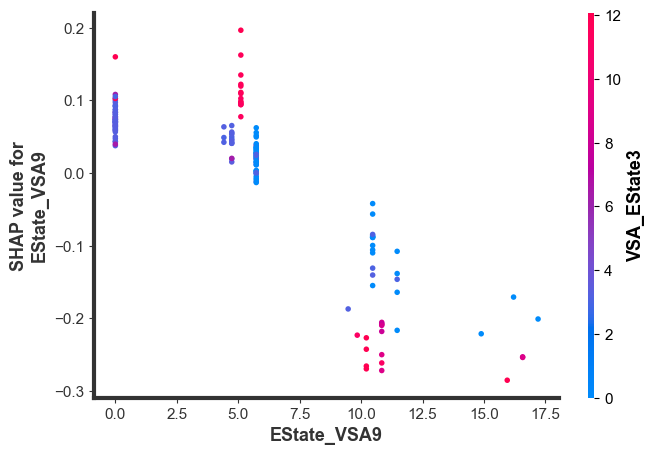

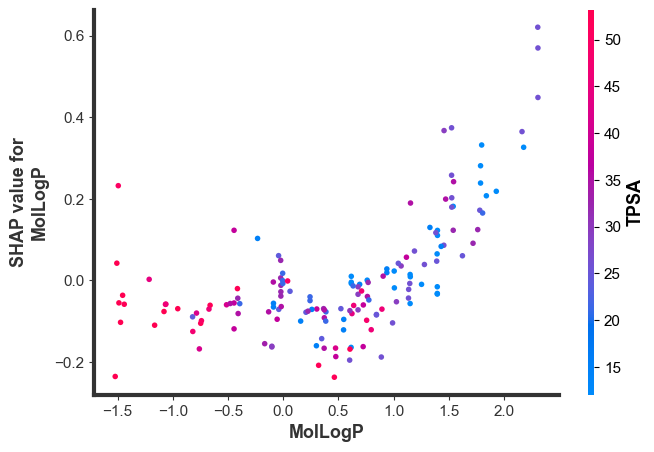

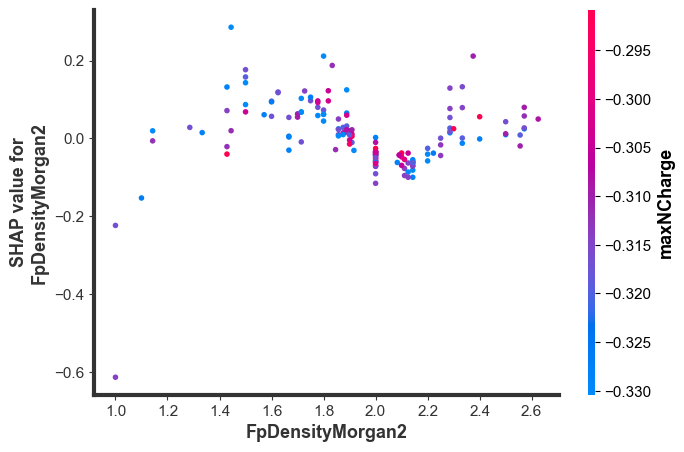

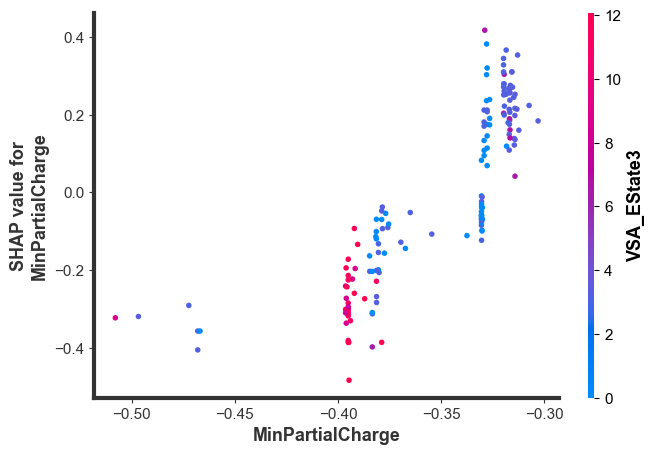

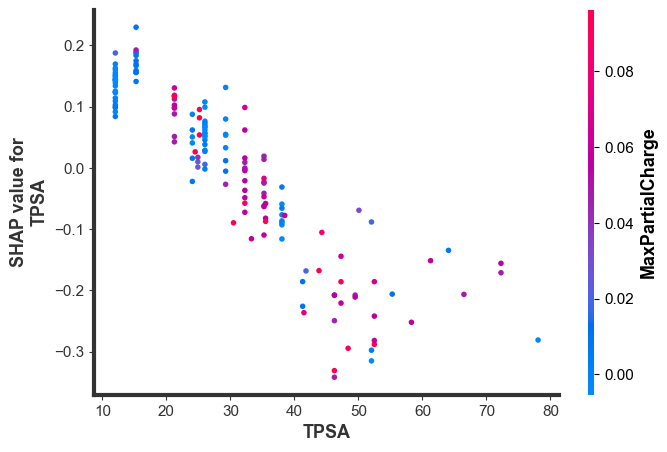

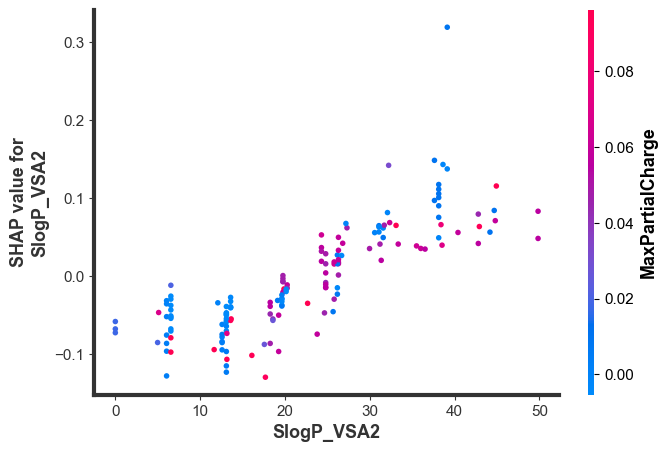

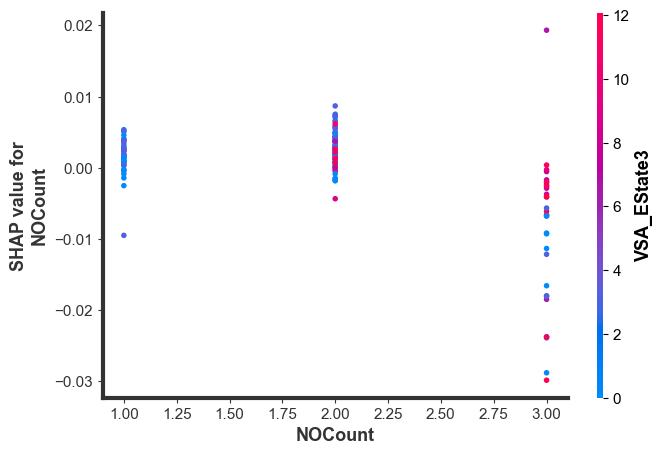

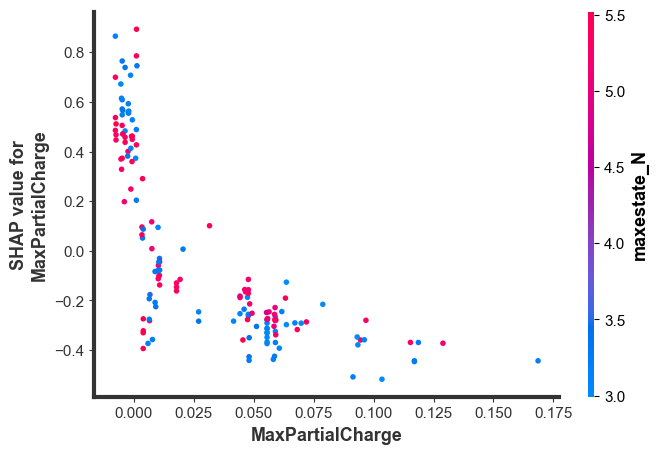

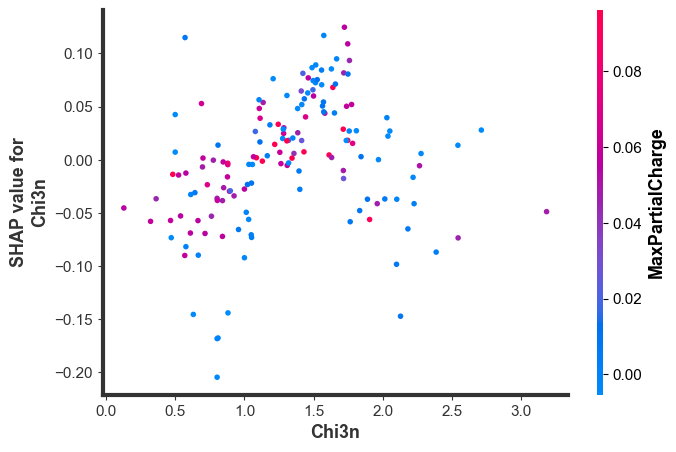

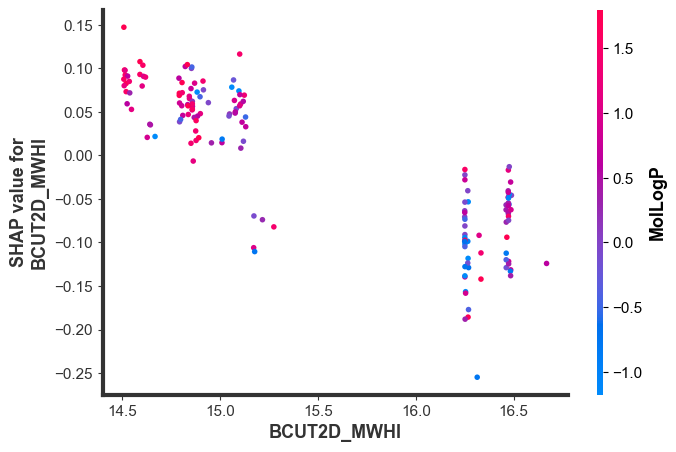

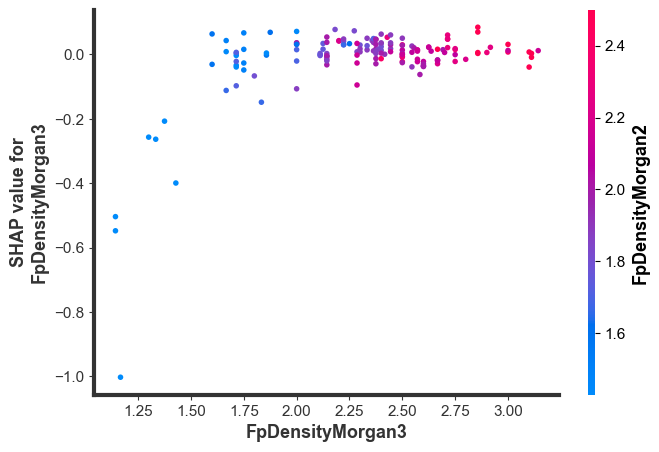

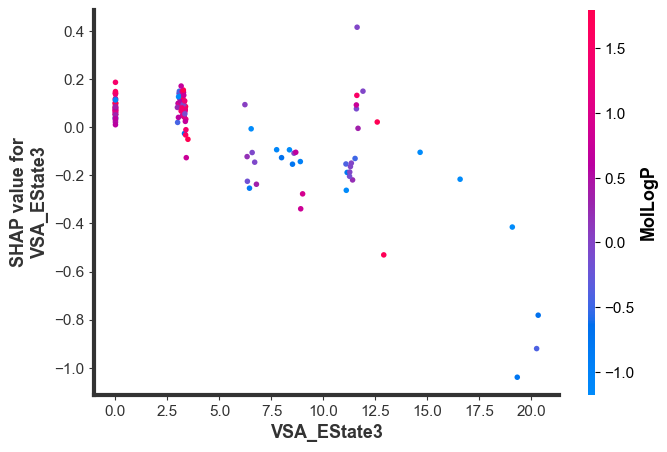

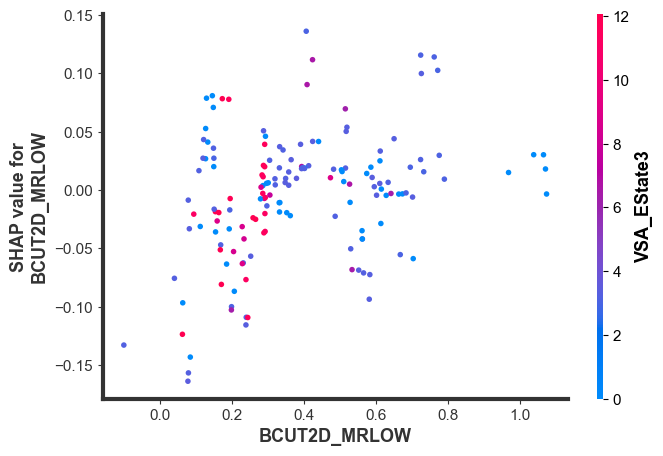

In [41]:

index = 0

for name in X_train_random.columns:
    shap.dependence_plot(name, shap_values, X_train_random)
    index += 1
    if index > 50:
        break


In [42]:
target_data = data['y']
# 最大
largest_item = target_data[target_data == target_data.max()].index[0]
# 最小
minest_item = target_data[target_data == target_data.min()].index[0]
# np.where(train_dataset['MeSH'] == 100)

In [43]:
max_diff_in_good_situation = 0
error_array = abs(y_train_random - model.predict(X_train_random))
worst_iloc_in_good_situation = 0
for i in range(len(y_train_random)):
    if error_array[i] > max_diff_in_good_situation and y_train_random[i] > 0.6:
        max_diff_in_good_situation = error_array[i]


for i in range(len(y_train_random)):
    if abs(error_array[i] - max_diff_in_good_situation) <= 0.0001:
        worst_iloc_in_good_situation=i
        
print(y_train_random[worst_iloc_in_good_situation])
print(model.predict(X_train_random)[worst_iloc_in_good_situation])

print(X_train_random.iloc[worst_iloc_in_good_situation])

-7.535923126
-6.545975591459996
maxNCharge          -0.317552
alphaV              22.751540
betaV                0.000000
maxestate_N          3.027778
SMR_VSA1             0.000000
EState_VSA9          0.000000
MolLogP              0.614200
FpDensityMorgan2     1.600000
MinPartialCharge    -0.317552
TPSA                12.030000
SlogP_VSA2          13.089513
NOCount              1.000000
MaxPartialCharge     0.000733
Chi3n                0.577350
BCUT2D_MWHI         14.835032
FpDensityMorgan3     1.600000
VSA_EState3          3.027778
BCUT2D_MRLOW         0.668170
Name: CNC(C)C, dtype: float64


In [44]:
max_diff = abs(y_train_random - model.predict(X_train_random)).max()
error_array = abs(y_train_random - model.predict(X_train_random))
worst_iloc=-1
for i in range(len(y_train_random)):
    if abs(error_array[i] - max_diff) <= 0.0001:
        worst_iloc=i
        
# print(y_train[worst_iloc])
# print(model_xgb.predict(X_train)[worst_iloc])

print(X_train_random.iloc[worst_iloc])

maxNCharge          -0.314206
alphaV               0.000000
betaV                0.000000
maxestate_N          3.222222
SMR_VSA1             0.000000
EState_VSA9          0.000000
MolLogP             -0.820800
FpDensityMorgan2     1.000000
MinPartialCharge    -0.314206
TPSA                24.060000
SlogP_VSA2          26.179026
NOCount              2.000000
MaxPartialCharge     0.007723
Chi3n                0.957107
BCUT2D_MWHI         15.011003
FpDensityMorgan3     1.166667
VSA_EState3          6.444444
BCUT2D_MRLOW         0.534252
Name: C1CNCCN1, dtype: float64


In [45]:
min_diff = abs(y_train_random - model.predict(X_train_random)).min()
best_iloc=-1
for i in range(len(y_train_random)):
    if abs(error_array[i] - min_diff) <= 0.0001:
        best_iloc=i
        
print(y_train_random[best_iloc])
print(model.predict(X_train_random)[best_iloc])

print(data.iloc[best_iloc])

-6.49646787
-6.499867174059995
maxNCharge            -0.330386
minNCharge            -0.330386
alphaV                 0.000000
betaV                  0.000000
gammaV                 0.000000
                         ...   
MaxPartialCharge       0.047756
MinPartialCharge      -0.381413
MaxAbsPartialCharge    0.381413
MinAbsPartialCharge    0.047756
y                     -7.444032
Name: CCCOCCCN, Length: 143, dtype: float64


maxNCharge          -0.330386
alphaV               0.000000
betaV                0.000000
maxestate_N          5.230743
SMR_VSA1             4.736863
EState_VSA9         10.470530
MolLogP              0.761800
FpDensityMorgan2     2.125000
MinPartialCharge    -0.381413
TPSA                35.250000
SlogP_VSA2          19.758520
NOCount              2.000000
MaxPartialCharge     0.047756
Chi3n                0.841261
BCUT2D_MWHI         16.472844
FpDensityMorgan3     2.625000
VSA_EState3          0.000000
BCUT2D_MRLOW         0.133647
Name: CCCOCCCN, dtype: float64
-7.444031763


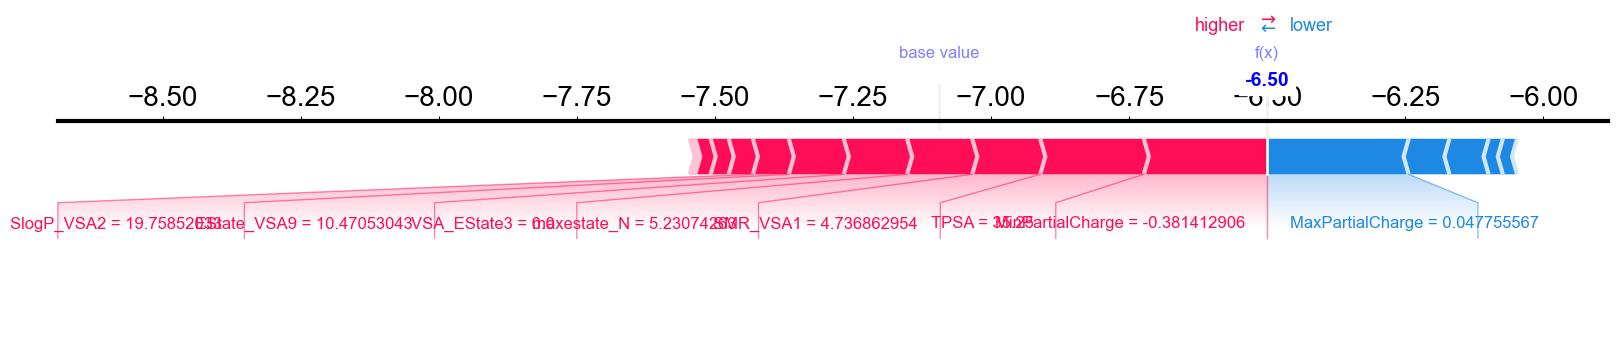

In [46]:
mpl.rcParams['font.size'] = 20

# 最大的值
shap.initjs()
print(train_dataset[select_name].iloc[best_iloc])
print(train_dataset['y'].iloc[best_iloc])
shap.force_plot(explainer.expected_value, shap_values[best_iloc], train_dataset[select_name].iloc[best_iloc],matplotlib=True) 

shap.force_plot(explainer.expected_value, shap_values[best_iloc], train_dataset[select_name].iloc[best_iloc])


maxNCharge          -0.330386
alphaV               0.000000
betaV                0.000000
maxestate_N          5.230743
SMR_VSA1             4.736863
EState_VSA9         10.470530
MolLogP              0.761800
FpDensityMorgan2     2.125000
MinPartialCharge    -0.381413
TPSA                35.250000
SlogP_VSA2          19.758520
NOCount              2.000000
MaxPartialCharge     0.047756
Chi3n                0.841261
BCUT2D_MWHI         16.472844
FpDensityMorgan3     2.625000
VSA_EState3          0.000000
BCUT2D_MRLOW         0.133647
Name: CCCOCCCN, dtype: float64
-7.444031763


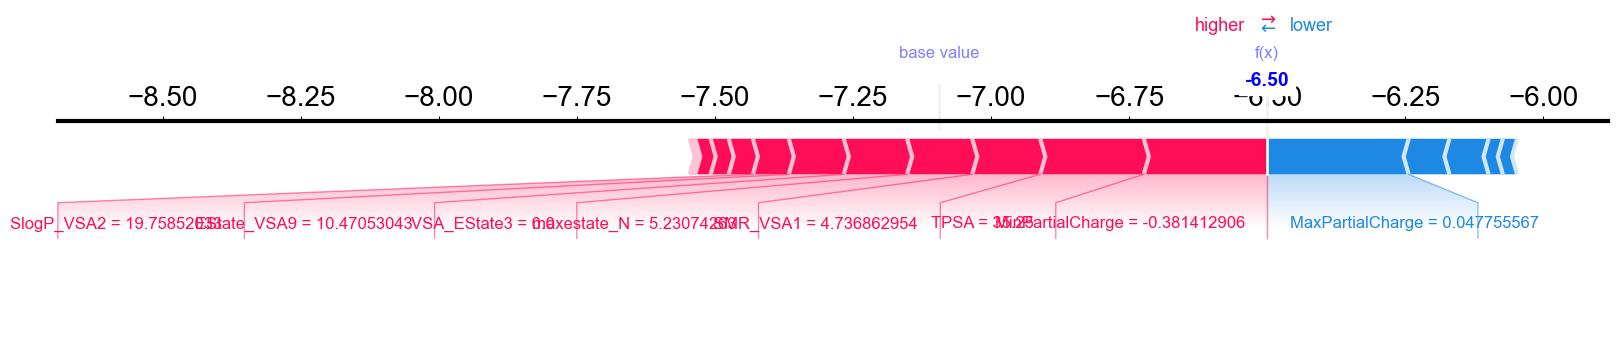

In [47]:
shap.initjs()
print(train_dataset[feature_column].iloc[best_iloc])
print(train_dataset['y'].iloc[best_iloc])

shap.force_plot(explainer.expected_value, shap_values[best_iloc], train_dataset[feature_column].iloc[best_iloc])
shap.force_plot(explainer.expected_value, shap_values[best_iloc], train_dataset[feature_column].iloc[best_iloc],matplotlib=True)

maxNCharge          -0.316958
alphaV               0.000000
betaV                0.000000
maxestate_N          3.086593
SMR_VSA1             0.000000
EState_VSA9          0.000000
MolLogP              0.205400
FpDensityMorgan2     2.000000
MinPartialCharge    -0.319703
TPSA                24.060000
SlogP_VSA2          26.681941
NOCount              2.000000
MaxPartialCharge    -0.003694
Chi3n                1.030330
BCUT2D_MWHI         14.858921
FpDensityMorgan3     2.500000
VSA_EState3          6.329649
BCUT2D_MRLOW         0.642346
Name: CCNCCCNC, dtype: float64


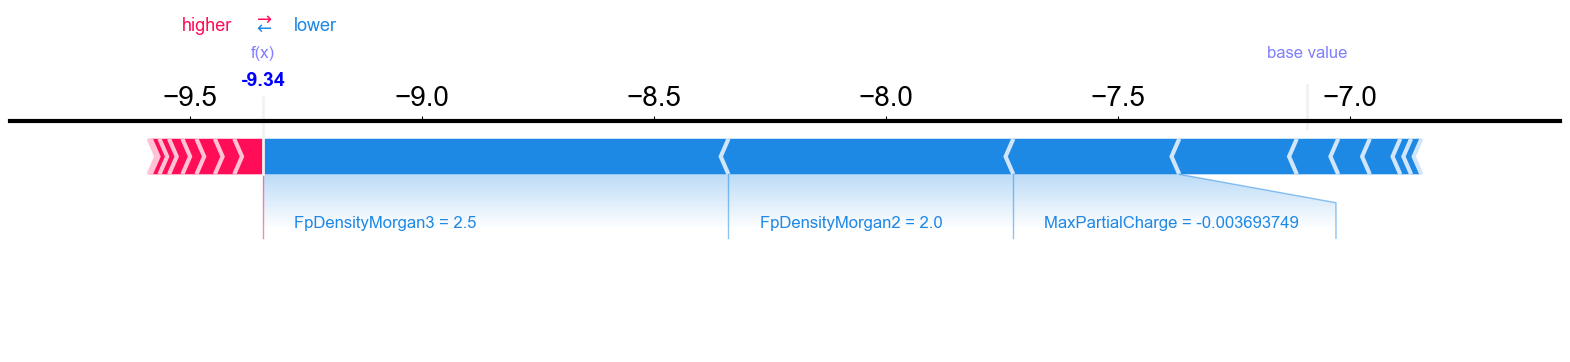

In [48]:
shap.initjs()
print(train_dataset[feature_column].iloc[worst_iloc])
shap.force_plot(explainer.expected_value, shap_values[worst_iloc], train_dataset[feature_column].iloc[worst_iloc])
shap.force_plot(explainer.expected_value, shap_values[worst_iloc], train_dataset[feature_column].iloc[worst_iloc],matplotlib=True)


maxNCharge          -0.316455
alphaV               0.000000
betaV                0.000000
maxestate_N          3.271991
SMR_VSA1             0.000000
EState_VSA9          0.000000
MolLogP              0.615800
FpDensityMorgan2     2.500000
MinPartialCharge    -0.316455
TPSA                12.030000
SlogP_VSA2          13.089513
NOCount              1.000000
MaxPartialCharge    -0.002268
Chi3n                1.306713
BCUT2D_MWHI         14.885305
FpDensityMorgan3     2.666667
VSA_EState3          3.271991
BCUT2D_MRLOW         0.651005
Name: CC1CCNC1, dtype: float64
-5.285483196


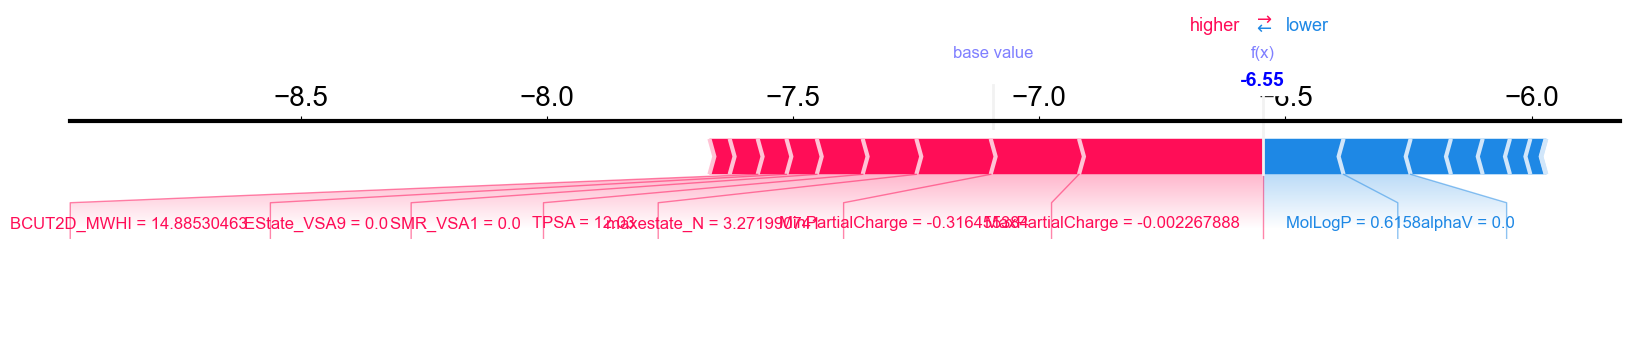

In [49]:

shap.initjs()
print(train_dataset[feature_column].iloc[worst_iloc_in_good_situation])
print(train_dataset['y'].iloc[worst_iloc_in_good_situation])
shap.force_plot(explainer.expected_value, shap_values[worst_iloc_in_good_situation], train_dataset[feature_column].iloc[worst_iloc_in_good_situation],matplotlib=True) 
shap.force_plot(explainer.expected_value, shap_values[worst_iloc_in_good_situation], train_dataset[feature_column].iloc[worst_iloc_in_good_situation]) 



In [50]:
# train_dataset[feature_column].loc["C1CNCCC1CN"]


maxNCharge          -0.330386
alphaV               0.000000
betaV                0.000000
maxestate_N          5.230743
SMR_VSA1             4.736863
EState_VSA9         10.470530
MolLogP              0.761800
FpDensityMorgan2     2.125000
MinPartialCharge    -0.381413
TPSA                35.250000
SlogP_VSA2          19.758520
NOCount              2.000000
MaxPartialCharge     0.047756
Chi3n                0.841261
BCUT2D_MWHI         16.472844
FpDensityMorgan3     2.625000
VSA_EState3          0.000000
BCUT2D_MRLOW         0.133647
Name: CCCOCCCN, dtype: float64
-7.444031763


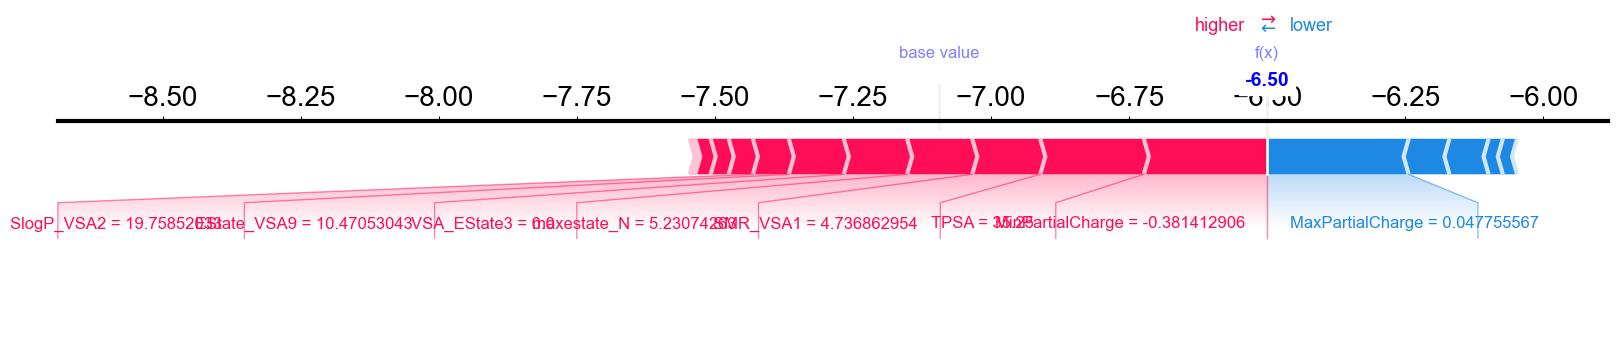

In [51]:
iloc = best_iloc
shap.initjs()
print(train_dataset[feature_column].iloc[iloc])
print(train_dataset['y'].iloc[iloc])
shap.force_plot(explainer.expected_value, shap_values[iloc], train_dataset[feature_column].iloc[iloc],matplotlib=True) 
shap.force_plot(explainer.expected_value, shap_values[iloc], train_dataset[feature_column].iloc[iloc]) 
